In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()


In [6]:
# accessing the raw data
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

### preprocessing 
# exploring the descriptive statistics of the varibles

In [8]:
raw_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [9]:
# droping the model columns cause its not that relevent we can easily find the model by 
# the brand ,mileage and EngineV 

data=raw_data.drop(['Model'],axis=1)   # axis 1 is for droping the columns and axis 0 is used for rows
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

## How to deal with the missing values 


In [11]:
data.isnull().sum()       # for checking the null values it will return true for null values else false 
                          # the sum function will count all the missing values that are present in the dataset  

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

## SO the rule of thumb is that if you have missing values less than 5% of the dataset then you can remove all the observation that have missing values  so here we will remove the all missing value observations 

In [13]:
# easiest way to remove the observations is to use adhoc method dropna() 
data_no_mv=data.dropna(axis=0)
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

## Exploring the probability Distributions we can easily do this by using the seaborn library functions displot()

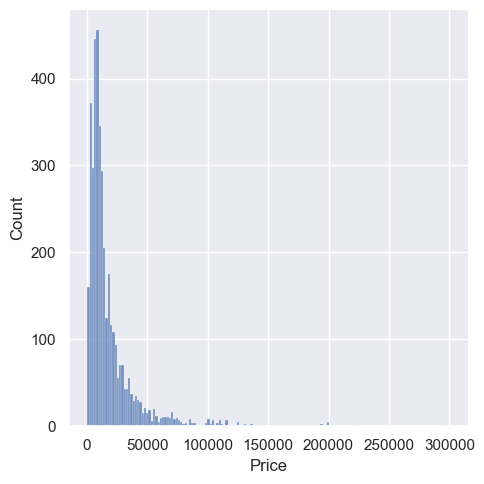

In [15]:
sns.displot(data_no_mv['Price'])

# we can see there are outliers in the price so one way to deal with them is to remove top 1% observations we can achieve this by DataFrame.quantile(the quantile) method returns the value at the given quantile(=np.percentile) pandas

In [17]:
q=data_no_mv['Price'].quantile(0.99)
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')


Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

In [2]:
sns.distplot(data_1['Price'])

NameError: name 'sns' is not defined

C:\Users\dell\AppData\Local\Temp\ipykernel_20204\1018459467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

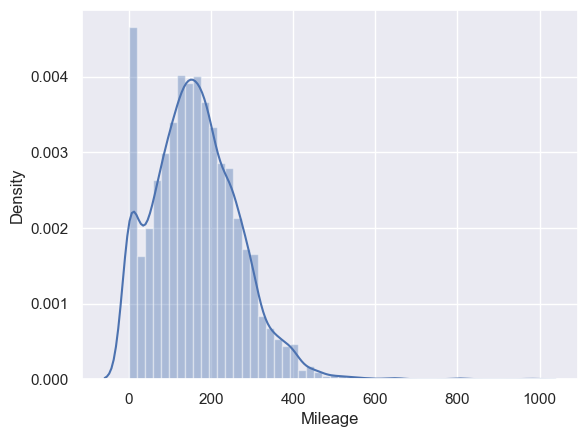

In [19]:
# mileage  
sns.distplot(data_no_mv['Mileage'])

In [20]:
q1=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q1]
data_2.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3944    3944.000000   3944  3944.000000  3944.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           867            NaN   1511          NaN          NaN   
mean           NaN   17933.880822    NaN   161.484026     2.747612   
std            NaN   19008.212025    NaN    96.027108     4.980406   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    7000.000000    NaN    92.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21376.250000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000    99.990000   

       Engine Type Registration         Year  
count         3944         3944  3944.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1825         3576          NaN  
mean           NaN          NaN  2006.389959  
std            NaN          NaN     6.595986  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

C:\Users\dell\AppData\Local\Temp\ipykernel_20204\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

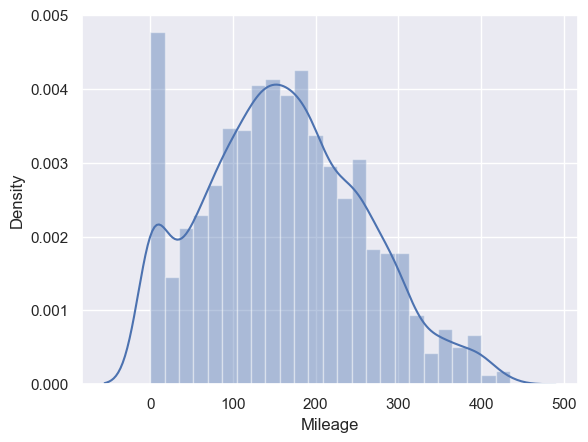

In [21]:
sns.distplot(data_2['Mileage'])

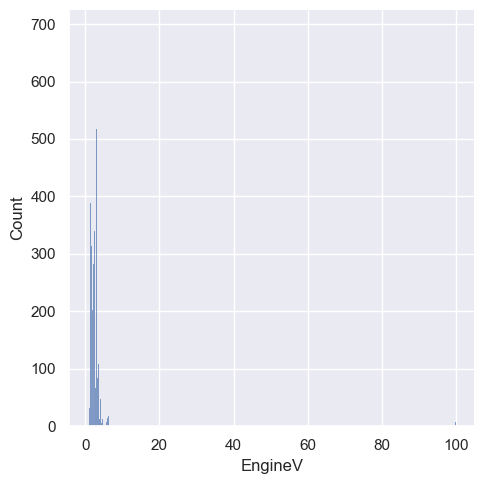

In [22]:
# engine volume 

sns.displot(data_no_mv['EngineV'])

# and interval where engine volume should normally fall is 0.6 to 6.5


In [24]:
data_3=data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3921    3921.000000   3921  3921.000000  3921.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           862            NaN   1499          NaN          NaN   
mean           NaN   17988.421311    NaN   161.279776     2.443497   
std            NaN   19041.658686    NaN    96.068269     0.946198   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    7000.000000    NaN    92.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21500.000000    NaN   229.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3921         3921  3921.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1818         3559          NaN  
mean           NaN          NaN  2006.406019  
std            NaN          NaN     6.595871  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

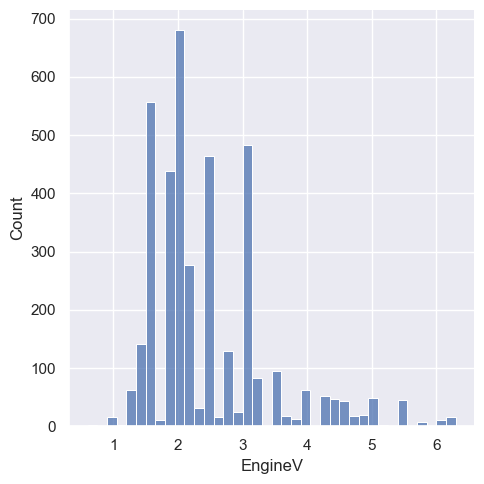

In [25]:
sns.displot(data_3['EngineV'])

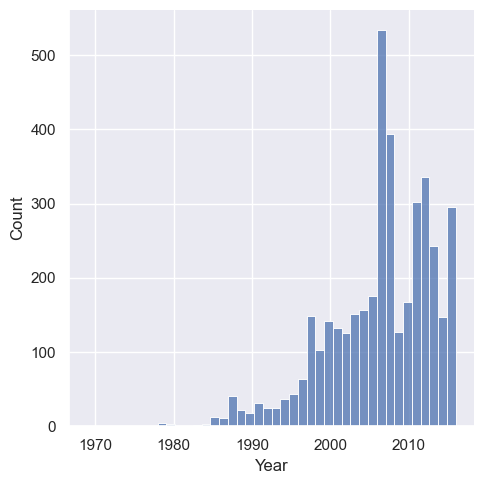

In [26]:
# year 

sns.displot(data_no_mv['Year'])

In [27]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]

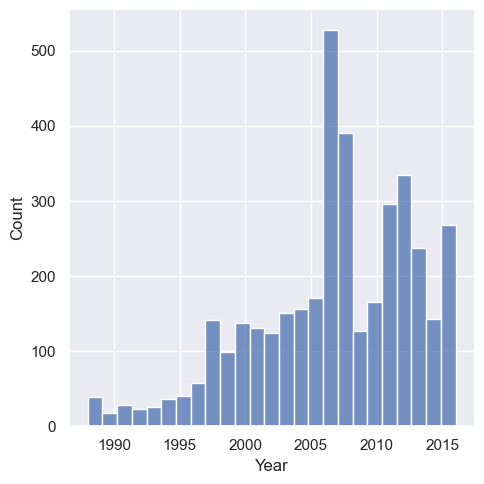

In [28]:
sns.displot(data_4['Year'])

In [29]:
data_4

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4338     Volkswagen   11500.0        van      163      2.5      Diesel   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4338          yes  2008  
4339          yes  2014  
4340          yes  2014  
4341          yes  1999  
4344          yes  2013  

[3867 rows x 8 columns]

In [30]:
# making new dataset with cleaned 
data_cleaned=data_4.reset_index(drop=True)  # droping the old index by reseting the index

In [31]:
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

## Checking the OLs assumptions 

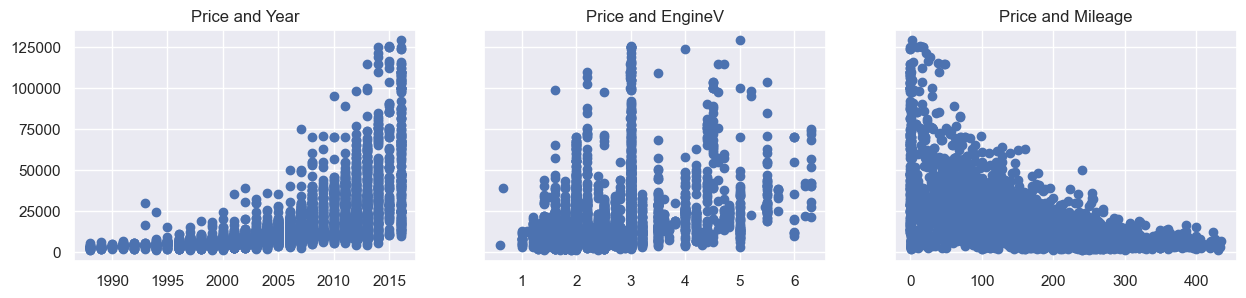

In [33]:
# 1.Linearity 

# for creating scatterplots for more than one in one go use the subplots() method

f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()


# we can see there is no linearity in the plots the patterns are exponential so to deal with this we can use log transformation 

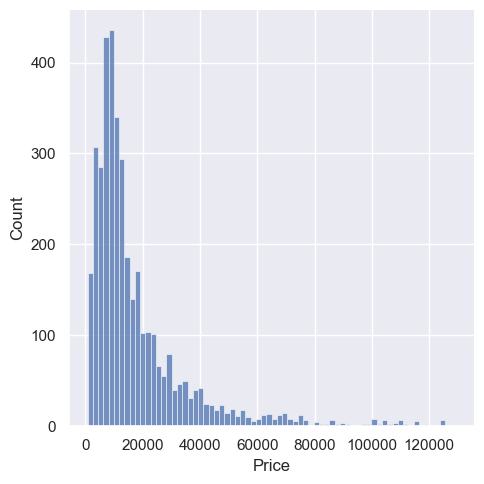

In [35]:
sns.displot(data_cleaned['Price'])

In [36]:
# there is method in the numpy library np.log(x) which returns the natural log of a number 
# or array of numbers

log_price=np.log(data_cleaned['Price'])
data_cleaned['log_Price']=log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  log_Price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3862          yes  2008   9.350102  
3863          yes  2014   9.792556  
3864          yes  2014  11.736069  
3865          yes  1999   8.779557  
3866          yes  2013   9.510445  

[3867 rows x 9 columns]

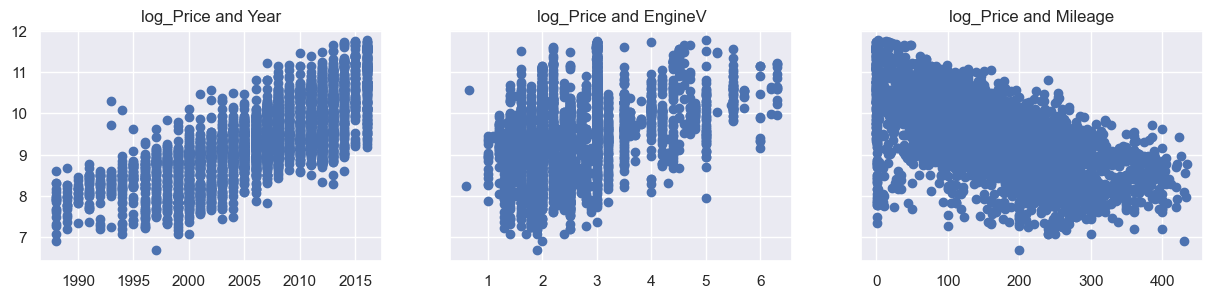

In [37]:
# plotting again to see the changes 

f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_Price'])
ax1.set_title('log_Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_Price'])
ax2.set_title('log_Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_Price'])
ax3.set_title('log_Price and Mileage')
plt.show()

# now we can see the linear pattern in the graphs so we have solved the one assumption linearity

In [45]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)


KeyError: "['Price'] not found in axis"

In [47]:
data_cleaned

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
3862     Volkswagen        van      163      2.5      Diesel          yes   
3863         Toyota      sedan       35      1.6      Petrol          yes   
3864  Mercedes-Benz      sedan        9      3.0      Diesel          yes   
3865            BMW      sedan        1      3.5      Petrol          yes   
3866     Volkswagen        van      124      2.0      Diesel          yes   

      Year  log_Price  
0     1991   8.342840  
1     1999   8.974618  
2     2003   9.495519  
3     2007  10.043249  
4     2011   9.814656  
...    ...        ...  
3862  2008   9.350102  
3863  2014   9.792556  
3864  2014  11.736069  
3865  1999   8.779557  
3866  2013   9.510445  

[3867 rows x 8 columns]

# we can confirm the normality and homoscedicity because the mean of errors is zero and the for the normality we add the intercept and as we had applied log transformation so there is no hetroscedicity 

# no autocorrelation in case of this the observations that we have are not coming from time series data or panel data so there is no autocorrelation 

# but for multicolineariy we could check 

# there is no method in the sklearn to check multicolinearity so we have to switch to the statsmodel It had one class for this VIF(variance inflation factor) it is best for checking multicolinearity 

In [51]:
# Multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [53]:
vif

VIF features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

# vif =1 :no multicollinearity 
# 1<vif<5 :perfectly okay
# 5<vif :perfectly okay 
# 10<vif :unacceptable



In [55]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [57]:
data_no_multicollinearity

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
3862     Volkswagen        van      163      2.5      Diesel          yes   
3863         Toyota      sedan       35      1.6      Petrol          yes   
3864  Mercedes-Benz      sedan        9      3.0      Diesel          yes   
3865            BMW      sedan        1      3.5      Petrol          yes   
3866     Volkswagen        van      124      2.0      Diesel          yes   

      log_Price  
0      8.342840  
1      8.974618  
2      9.495519  
3     10.043249  
4      9.814656  
...         ...  
3862   9.350102  
3863   9.792556  
3864  11.736069  
3865   8.779557  
3866   9.510445  

[3867 rows x 7 columns]

## Create dummy variables

# for creating multiple dummy variables automatically we have a function to do that        pd.get_dummies(df[,drop_first]) spots all categorical variables and creates dummies autmomatically  if we have n categories then there will n-1 dummies because we can get the first one by the other n-1  so we will create n-1 dummies 

In [59]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True) # drop_first is set to true so that no dummy is created for Bmw

In [61]:
data_with_dummies.head()

Mileage  EngineV  log_Price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840       True                False   
1      427      2.9   8.974618      False                 True   
2      358      5.0   9.495519      False                 True   
3      240      4.2  10.043249      False                False   
4      120      2.0   9.814656      False                False   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0             False          False         False             False   
1             False          False         False             False   
2             False          False         False             False   
3             False          False         False             False   
4             False          False          True             False   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0       False       False        True       False     False            False   
1       False       False       False       False      True            False   
2       False       False        True       False     False             True   
3       False       False       False       False     False            False   
4       False       False       False       False     False            False   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0              False                True              True  
1              False               False              True  
2              False               False              True  
3              False                True              True  
4              False                True              True

In [63]:
# reordering columns  

data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [65]:
cols=['log_Price','Mileage','EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
      

In [67]:
data_preprocessed=data_with_dummies[cols]

In [69]:
data_preprocessed.head()

log_Price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0       True                False   
1   8.974618      427      2.9      False                 True   
2   9.495519      358      5.0      False                 True   
3  10.043249      240      4.2      False                False   
4   9.814656      120      2.0      False                False   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0             False          False         False             False   
1             False          False         False             False   
2             False          False         False             False   
3             False          False         False             False   
4             False          False          True             False   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0       False       False        True       False     False            False   
1       False       False       False       False      True            False   
2       False       False        True       False     False             True   
3       False       False       False       False     False            False   
4       False       False       False       False     False            False   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0              False                True              True  
1              False               False              True  
2              False               False              True  
3              False                True              True  
4              False                True              True

## Linear Regression Model 

In [71]:
# declaring the targets and inputs

targets=data_preprocessed['log_Price']
inputs=data_preprocessed.drop(['log_Price'],axis=1)


# Scale the data by using the Standard Scaler class

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [75]:
inputs_scaled=scaler.transform(inputs)

# this will scale all the inputs but its not good to standardize the dummy variables because when we do that they loose all their predictive power so it's better to not do so 

## Spliting the data into training and testing by train_test_split class 

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)


## Create the regression model 

In [81]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [83]:
# predicting 

y_hat=reg.predict(x_train)

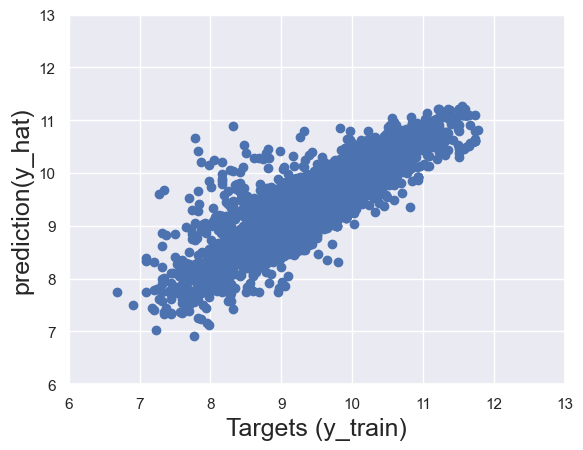

In [85]:
#  Regression plot 

plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('prediction(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual pdf')

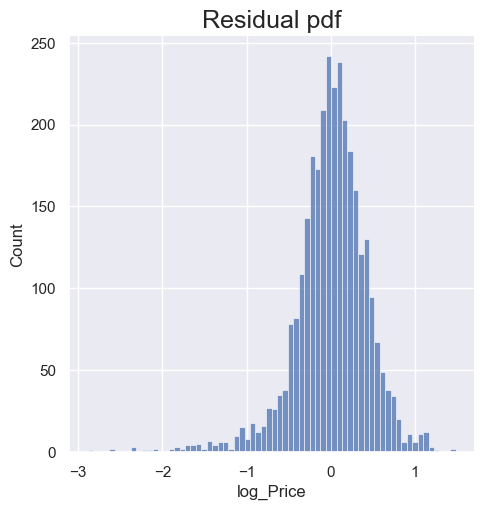

In [87]:
# residual plot
sns.displot(y_train-y_hat)
plt.title('Residual pdf',size=18)

# There are certain observation for which (y_train-y_hat) is much lower than the mean (a much higher price is predicated than is observed)

In [89]:
# r-score 
reg.score(x_train,y_train)

0.744996578792662

so our model is predicating 75 % varibility 

In [91]:
 # finding the weights and bias 

reg.intercept_


9.415239458021299

In [93]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [97]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

Features   Weights
0               Mileage -0.448713
1               EngineV  0.209035
2             Brand_BMW  0.014250
3   Brand_Mercedes-Benz  0.012882
4      Brand_Mitsubishi -0.140552
5         Brand_Renault -0.179909
6          Brand_Toyota -0.060550
7      Brand_Volkswagen -0.089924
8            Body_hatch -0.145469
9            Body_other -0.101444
10           Body_sedan -0.200630
11           Body_vagon -0.129887
12             Body_van -0.168597
13      Engine Type_Gas -0.121490
14    Engine Type_Other -0.033368
15   Engine Type_Petrol -0.146909
16     Registration_yes  0.320473

# Weights Interpretation 
1. A positive weight shows that as a features increases in value, so do the log_price and price respectively for e.g the engine volume the bigger the engineV so the higher  price or log_price 
2. A negative weight shows that as a features increase in value ,log_price and price decreases respectively for e.g if mileage increases than the price and log_price will decrease



In [99]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# for dummy varibles weight interpretation 

since the audi is dropped out from the dummies that means audi is the benchmark for dummies 

1. so a positive weight for a dummy shows that the respective category (brand) is expensive than the benchmark(audi) for e.g in the table the bmw's weight is slightly positive so bmw is more expensive than the audi rest are negative so they are cheaper than audi.

the dummy's(categories) should always compared with the benchmark category 

The bigger the weight the more the impact 


# Testing 


In [101]:
y_hat_test=reg.predict(x_test)

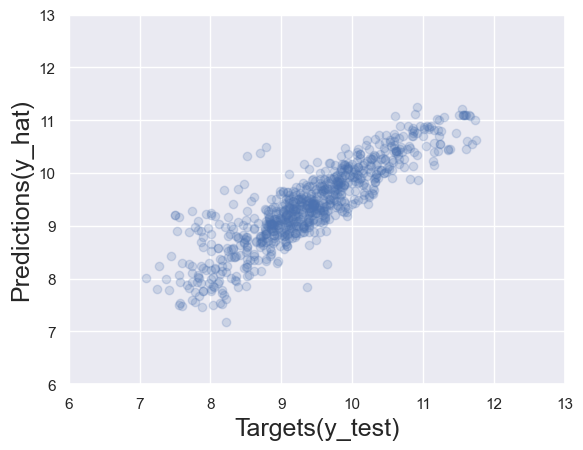

In [105]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets(y_test)',size=18)
plt.ylabel('Predictions(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [109]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

Prediction
0  10685.501696
1   3499.255242
2   7553.285218
3   7463.963017
4  11353.490075

In [115]:
df_pf['Target']=np.exp(y_test.reset_index(drop=True))
df_pf.head()

Prediction  Target
0  10685.501696  2300.0
1   3499.255242  2800.0
2   7553.285218  2500.0
3   7463.963017  6400.0
4  11353.490075  9150.0

In [119]:
# residual 

df_pf['Residual']=df_pf['Target']-df_pf['Prediction']

In [121]:
# residual in % form 

df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction   Target      Residual  Difference%
0    10685.501696   2300.0  -8385.501696   364.587030
1     3499.255242   2800.0   -699.255242    24.973402
2     7553.285218   2500.0  -5053.285218   202.131409
3     7463.963017   6400.0  -1063.963017    16.624422
4    11353.490075   9150.0  -2203.490075    24.081859
..            ...      ...           ...          ...
769  29651.726363  29500.0   -151.726363     0.514327
770  10732.071179   9600.0  -1132.071179    11.792408
771  13922.446953  18300.0   4377.553047    23.921055
772  27487.751303  68500.0  41012.248697    59.871896
773  13491.163043  10800.0  -2691.163043    24.918176

[774 rows x 4 columns]

In [123]:
df_pf.describe()

Prediction         Target      Residual  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   15946.760167   18165.817106   2219.056939    36.256693
std    13133.197604   19967.858908  10871.218143    55.066507
min     1320.562768    1200.000000 -29456.498331     0.062794
25%     7413.644234    6900.000000  -2044.191251    12.108022
50%    11568.168859   11600.000000    142.518577    23.467728
75%    20162.408805   20500.000000   3147.343497    39.563570
max    77403.055224  126000.000000  85106.162329   512.688080